# 資料匯入與處理

In [1]:
import pandas as pd

df_ml = pd.read_csv('tw_house.csv', encoding='big5')
df_ml.sample(5)

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,...,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
294,中山區,9.71,161.64,210428,3,1,2,33.33,2000000,1,...,0,0,0,0,0,0,0,0,0,0
114,士林區,25.11,87.51,166322,2,1,2,0.00,0,1,...,0,0,0,0,1,0,0,0,0,0
26,內湖區,49.24,129.81,113088,2,2,2,0.00,0,20,...,0,1,0,0,0,0,0,0,0,0
618,中山區,4.08,34.70,67723,0,0,0,0.00,0,38,...,0,0,0,0,0,0,0,0,0,0
345,內湖區,17.66,208.33,71521,4,2,2,0.00,0,3,...,0,1,0,0,0,0,0,0,0,0


In [2]:
from sklearn.model_selection import train_test_split

X = df_ml.drop(['鄉鎮市區','總價元'],axis=1) #去除鄉鎮市區、總價元兩個欄位
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,...,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
354,30.75,78.44,127486,3,1,1,0.00,0,44,62,...,1,0,0,0,0,0,0,0,0,0
176,10.75,194.80,161713,3,2,2,38.69,0,28,78,...,0,0,0,0,0,1,0,0,0,0
430,8.53,51.32,263055,1,1,1,0.00,0,11,95,...,1,0,0,0,0,0,0,0,0,0
269,14.78,78.55,315086,1,2,1,0.00,0,6,100,...,0,0,0,0,0,0,1,0,0,0
310,38.61,108.37,98736,3,2,2,0.00,0,42,64,...,0,0,1,0,0,0,0,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

# MLP with Keras
可試看看不同 #hidden layer, activation, optimizer, epochs, batch_size

In [4]:
X_train_std.shape

(448, 23)

In [5]:
# Custom Metrics: R Square Score for Keras metrics
import keras.backend as K
def r_squared(y_true, y_pred):
    SS_res = K.sum((y_true - y_pred)**2) 
    SS_tot = K.sum((y_true - K.mean(y_true))**2) 
    return (1 - SS_res/SS_tot)

Using TensorFlow backend.


### optimizer可使用: sgd, adam, rmsprop, adagrad, adadelta 等

或使用from keras import optimizer設定更詳細參數 (如使用SGD with momentum)
https://keras.io/optimizers/

In [6]:
from keras.models import Sequential
from keras.layers import Dense

# 產生Sequential Model
model = Sequential()

# 增加一層: (hidden)layer=50, input layer=23, 初始weights為常態分佈(normal distribution), activation function為ReLU
model.add(Dense(50, input_dim=23, kernel_initializer='normal',activation='relu'))

# 增加一層: (output)layer=1, weights為常態分佈(normal distribution)
model.add(Dense(1, kernel_initializer='normal'))

# 建立模型: Loss function為MSE, optimizer為adam
model.compile(loss='mse', optimizer='adam',metrics=[r_squared])

### 模型摘要

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                1200      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


### 用history紀錄訓練過程歷史

In [8]:
history = model.fit(X_std, y.values, epochs=500, batch_size=20, validation_split=0.3)

Train on 448 samples, validate on 192 samples
Epoch 1/500
448/448 [==============================] - 0s 346us/step - loss: 9479370.4676 - r_squared: -1.5091 - val_loss: 17836347.6042 - val_r_squared: -1.3719
Epoch 2/500
448/448 [==============================] - 0s 66us/step - loss: 9477958.4643 - r_squared: -1.6927 - val_loss: 17834279.5156 - val_r_squared: -1.3716
Epoch 3/500
448/448 [==============================] - 0s 99us/step - loss: 9475971.0290 - r_squared: -1.6471 - val_loss: 17830739.6458 - val_r_squared: -1.3710
Epoch 4/500
448/448 [==============================] - 0s 66us/step - loss: 9472496.2210 - r_squared: -1.6795 - val_loss: 17825543.8854 - val_r_squared: -1.3701
Epoch 5/500
448/448 [==============================] - 0s 57us/step - loss: 9467487.2589 - r_squared: -1.4590 - val_loss: 17817812.5417 - val_r_squared: -1.3689
Epoch 6/500
448/448 [==============================] - 0s 57us/step - loss: 9460335.5446 - r_squared: -1.5092 - val_loss: 17806938.1198 - val_r_squa

448/448 [==============================] - 0s 52us/step - loss: 6985141.5580 - r_squared: -0.8115 - val_loss: 14477094.6094 - val_r_squared: -0.8651
Epoch 52/500
448/448 [==============================] - 0s 54us/step - loss: 6901215.8237 - r_squared: -0.8063 - val_loss: 14372764.6458 - val_r_squared: -0.8493
Epoch 53/500
448/448 [==============================] - 0s 64us/step - loss: 6820565.7299 - r_squared: -0.7960 - val_loss: 14266195.1198 - val_r_squared: -0.8332
Epoch 54/500
448/448 [==============================] - 0s 51us/step - loss: 6735945.1685 - r_squared: -0.9451 - val_loss: 14135077.2448 - val_r_squared: -0.8151
Epoch 55/500
448/448 [==============================] - 0s 60us/step - loss: 6651464.3951 - r_squared: -0.7610 - val_loss: 14022039.3333 - val_r_squared: -0.7986
Epoch 56/500
448/448 [==============================] - 0s 56us/step - loss: 6570876.1183 - r_squared: -0.6804 - val_loss: 13910454.8542 - val_r_squared: -0.7821
Epoch 57/500
448/448 [===================

Epoch 102/500
448/448 [==============================] - 0s 51us/step - loss: 3362677.7980 - r_squared: 0.0392 - val_loss: 8925432.8620 - val_r_squared: -0.0980
Epoch 103/500
448/448 [==============================] - 0s 57us/step - loss: 3313819.0324 - r_squared: 0.0149 - val_loss: 8839732.3333 - val_r_squared: -0.0870
Epoch 104/500
448/448 [==============================] - 0s 56us/step - loss: 3269868.9509 - r_squared: 0.0666 - val_loss: 8742232.1250 - val_r_squared: -0.0754
Epoch 105/500
448/448 [==============================] - 0s 48us/step - loss: 3221010.0770 - r_squared: 0.1702 - val_loss: 8661135.8854 - val_r_squared: -0.0648
Epoch 106/500
448/448 [==============================] - 0s 52us/step - loss: 3176361.2946 - r_squared: 0.1722 - val_loss: 8580736.1380 - val_r_squared: -0.0546
Epoch 107/500
448/448 [==============================] - 0s 55us/step - loss: 3133118.5279 - r_squared: 0.1535 - val_loss: 8486032.8490 - val_r_squared: -0.0432
Epoch 108/500
448/448 [===========

Epoch 153/500
448/448 [==============================] - 0s 52us/step - loss: 1996533.4933 - r_squared: 0.4192 - val_loss: 5869172.3333 - val_r_squared: 0.2641
Epoch 154/500
448/448 [==============================] - 0s 54us/step - loss: 1984596.0000 - r_squared: 0.2511 - val_loss: 5835214.8438 - val_r_squared: 0.2681
Epoch 155/500
448/448 [==============================] - 0s 52us/step - loss: 1973639.2958 - r_squared: 0.4553 - val_loss: 5800710.3177 - val_r_squared: 0.2719
Epoch 156/500
448/448 [==============================] - 0s 58us/step - loss: 1961435.1306 - r_squared: 0.4497 - val_loss: 5773989.6146 - val_r_squared: 0.2753
Epoch 157/500
448/448 [==============================] - 0s 56us/step - loss: 1951077.9715 - r_squared: 0.2250 - val_loss: 5738923.6797 - val_r_squared: 0.2793
Epoch 158/500
448/448 [==============================] - 0s 51us/step - loss: 1940518.8368 - r_squared: 0.3931 - val_loss: 5708101.4766 - val_r_squared: 0.2831
Epoch 159/500
448/448 [=================

448/448 [==============================] - 0s 49us/step - loss: 1575312.9805 - r_squared: 0.4707 - val_loss: 4780602.8997 - val_r_squared: 0.4087
Epoch 205/500
448/448 [==============================] - 0s 47us/step - loss: 1568810.5815 - r_squared: 0.4976 - val_loss: 4766522.3698 - val_r_squared: 0.4108
Epoch 206/500
448/448 [==============================] - 0s 49us/step - loss: 1562502.8242 - r_squared: 0.4857 - val_loss: 4754339.2253 - val_r_squared: 0.4131
Epoch 207/500
448/448 [==============================] - 0s 50us/step - loss: 1555858.8901 - r_squared: 0.4214 - val_loss: 4738956.2839 - val_r_squared: 0.4150
Epoch 208/500
448/448 [==============================] - 0s 57us/step - loss: 1550100.8717 - r_squared: 0.4868 - val_loss: 4728409.8099 - val_r_squared: 0.4173
Epoch 209/500
448/448 [==============================] - 0s 52us/step - loss: 1543668.0753 - r_squared: 0.4409 - val_loss: 4711281.0755 - val_r_squared: 0.4196
Epoch 210/500
448/448 [==============================]

448/448 [==============================] - 0s 50us/step - loss: 1284788.1183 - r_squared: 0.5337 - val_loss: 4248351.9180 - val_r_squared: 0.5054
Epoch 256/500
448/448 [==============================] - 0s 49us/step - loss: 1279200.1498 - r_squared: 0.5912 - val_loss: 4238615.8294 - val_r_squared: 0.5072
Epoch 257/500
448/448 [==============================] - 0s 52us/step - loss: 1274082.1889 - r_squared: 0.5934 - val_loss: 4221886.8112 - val_r_squared: 0.5090
Epoch 258/500
448/448 [==============================] - 0s 52us/step - loss: 1269284.4071 - r_squared: 0.5992 - val_loss: 4219289.0026 - val_r_squared: 0.5106
Epoch 259/500
448/448 [==============================] - 0s 54us/step - loss: 1263977.4852 - r_squared: 0.4948 - val_loss: 4211628.5482 - val_r_squared: 0.5125
Epoch 260/500
448/448 [==============================] - 0s 52us/step - loss: 1258153.9252 - r_squared: 0.5283 - val_loss: 4200023.8477 - val_r_squared: 0.5143
Epoch 261/500
448/448 [==============================]

448/448 [==============================] - 0s 56us/step - loss: 1040475.9478 - r_squared: 0.6634 - val_loss: 3903996.7539 - val_r_squared: 0.5852
Epoch 307/500
448/448 [==============================] - 0s 52us/step - loss: 1036524.4478 - r_squared: 0.6462 - val_loss: 3903727.1341 - val_r_squared: 0.5865
Epoch 308/500
448/448 [==============================] - 0s 53us/step - loss: 1032127.3239 - r_squared: 0.7094 - val_loss: 3894069.0905 - val_r_squared: 0.5879
Epoch 309/500
448/448 [==============================] - 0s 56us/step - loss: 1028150.5653 - r_squared: 0.6859 - val_loss: 3888525.6133 - val_r_squared: 0.5893
Epoch 310/500
448/448 [==============================] - 0s 57us/step - loss: 1024269.6049 - r_squared: 0.6714 - val_loss: 3877085.1094 - val_r_squared: 0.5907
Epoch 311/500
448/448 [==============================] - 0s 58us/step - loss: 1019402.6406 - r_squared: 0.6006 - val_loss: 3874623.6673 - val_r_squared: 0.5921
Epoch 312/500
448/448 [==============================]

448/448 [==============================] - 0s 51us/step - loss: 847884.5550 - r_squared: 0.7399 - val_loss: 3654356.3594 - val_r_squared: 0.6507
Epoch 358/500
448/448 [==============================] - 0s 53us/step - loss: 844748.4978 - r_squared: 0.7161 - val_loss: 3645689.1029 - val_r_squared: 0.6519
Epoch 359/500
448/448 [==============================] - 0s 51us/step - loss: 841564.7972 - r_squared: 0.7284 - val_loss: 3640327.5163 - val_r_squared: 0.6530
Epoch 360/500
448/448 [==============================] - 0s 47us/step - loss: 838635.9946 - r_squared: 0.7161 - val_loss: 3632070.0807 - val_r_squared: 0.6541
Epoch 361/500
448/448 [==============================] - 0s 52us/step - loss: 835531.5908 - r_squared: 0.7057 - val_loss: 3630156.3900 - val_r_squared: 0.6552
Epoch 362/500
448/448 [==============================] - 0s 57us/step - loss: 832481.3624 - r_squared: 0.7365 - val_loss: 3618782.8711 - val_r_squared: 0.6564
Epoch 363/500
448/448 [==============================] - 0s 

448/448 [==============================] - 0s 49us/step - loss: 717198.7009 - r_squared: 0.8196 - val_loss: 3444587.5085 - val_r_squared: 0.7008
Epoch 409/500
448/448 [==============================] - 0s 54us/step - loss: 716815.9305 - r_squared: 0.7905 - val_loss: 3462444.6462 - val_r_squared: 0.7016
Epoch 410/500
448/448 [==============================] - 0s 62us/step - loss: 713434.2408 - r_squared: 0.7667 - val_loss: 3451435.9284 - val_r_squared: 0.7026
Epoch 411/500
448/448 [==============================] - 0s 61us/step - loss: 711624.4178 - r_squared: 0.7484 - val_loss: 3443069.1895 - val_r_squared: 0.7029
Epoch 412/500
448/448 [==============================] - 0s 65us/step - loss: 708974.7148 - r_squared: 0.7866 - val_loss: 3445666.9378 - val_r_squared: 0.7038
Epoch 413/500
448/448 [==============================] - 0s 55us/step - loss: 707513.9062 - r_squared: 0.7504 - val_loss: 3438089.6475 - val_r_squared: 0.7047
Epoch 414/500
448/448 [==============================] - 0s 

448/448 [==============================] - 0s 47us/step - loss: 632195.0806 - r_squared: 0.7676 - val_loss: 3307487.5342 - val_r_squared: 0.7362
Epoch 460/500
448/448 [==============================] - 0s 47us/step - loss: 630747.2026 - r_squared: 0.8155 - val_loss: 3308616.6504 - val_r_squared: 0.7368
Epoch 461/500
448/448 [==============================] - 0s 49us/step - loss: 629339.9337 - r_squared: 0.7626 - val_loss: 3306776.8532 - val_r_squared: 0.7373
Epoch 462/500
448/448 [==============================] - 0s 46us/step - loss: 627815.8343 - r_squared: 0.8409 - val_loss: 3300968.4489 - val_r_squared: 0.7380
Epoch 463/500
448/448 [==============================] - 0s 47us/step - loss: 626472.1907 - r_squared: 0.8135 - val_loss: 3294329.8229 - val_r_squared: 0.7383
Epoch 464/500
448/448 [==============================] - 0s 47us/step - loss: 625335.3249 - r_squared: 0.8094 - val_loss: 3294818.7585 - val_r_squared: 0.7389
Epoch 465/500
448/448 [==============================] - 0s 

In [9]:
history.history.items()

dict_items([('val_loss', [17836347.604166668, 17834279.515625, 17830739.645833332, 17825543.885416668, 17817812.541666668, 17806938.119791668, 17792468.083333332, 17776229.4375, 17754778.364583332, 17727711.729166668, 17700681.958333332, 17668053.619791668, 17631892.510416668, 17593421.5625, 17550953.348958332, 17503258.484375, 17457496.145833332, 17400512.765625, 17347065.333333332, 17288213.354166668, 17221407.265625, 17162825.328125, 17098914.59375, 17034413.635416668, 16967212.604166668, 16892729.041666668, 16817896.130208332, 16743895.994791666, 16668521.8125, 16586775.354166666, 16504117.265625, 16422051.34375, 16335117.625, 16244083.375, 16140557.635416666, 16054374.713541666, 15958647.21875, 15866038.765625, 15767754.520833334, 15669814.854166666, 15567092.0625, 15461208.984375, 15360732.03125, 15253626.541666666, 15150896.463541666, 15032846.833333334, 14927371.942708334, 14807196.520833334, 14700824.588541666, 14591576.802083334, 14477094.609375, 14372764.645833334, 14266195.

In [10]:
history.history.get('val_r_squared')

[-1.3719262381394703,
 -1.3715584849317868,
 -1.3709725737571716,
 -1.3701223159829776,
 -1.3688740606109302,
 -1.367121768494447,
 -1.3648327986399333,
 -1.3621925388773282,
 -1.3587905516227086,
 -1.3546579753359158,
 -1.3503296623627346,
 -1.3453630531827609,
 -1.3397808844844501,
 -1.3337963794668515,
 -1.3271771669387817,
 -1.3198932235439618,
 -1.3127853448192279,
 -1.3041499952475231,
 -1.2958156764507294,
 -1.2869830181201298,
 -1.2769230604171753,
 -1.2678171917796135,
 -1.2579497024416924,
 -1.2480612273017566,
 -1.2377074236671131,
 -1.2264854858318965,
 -1.2152992536624272,
 -1.2039364228645961,
 -1.192409336566925,
 -1.1801573187112808,
 -1.1673583537340164,
 -1.1549930348992348,
 -1.1419192800919216,
 -1.1282643278439839,
 -1.1128693645199139,
 -1.0997496371467907,
 -1.0853800103068352,
 -1.0714196885625522,
 -1.0566794549425442,
 -1.0418103784322739,
 -1.0265087982018788,
 -1.010301483174165,
 -0.99562522768974304,
 -0.97981252769629157,
 -0.9640572418769201,
 -0.9469788

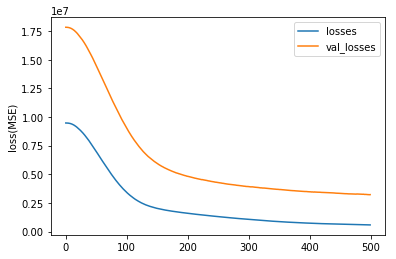

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
losses = history.history.get('loss')
val_losses = history.history.get('val_loss')
x = [i for i in range(len(losses))]
plt.plot(x, losses, label='losses')
plt.plot(x, val_losses, label='val_losses')
plt.ylabel('loss(MSE)')
plt.legend()
plt.show()

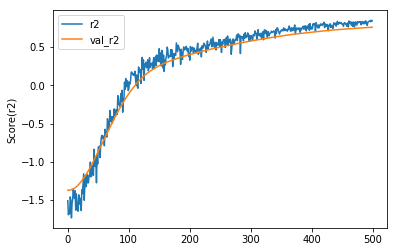

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
r2 = history.history.get('r_squared')
val_r2 = history.history.get('val_r_squared')
x = [i for i in range(len(r2))]
plt.plot(x, r2, label='r2')
plt.plot(x, val_r2, label='val_r2')
plt.ylabel('Score(r2)')
plt.legend()
plt.show()

In [13]:
model.evaluate(X_test_std, y_test.values, batch_size=192)

192/192 [==============================] - 0s 5us/step


[674173.6875, 0.84443533420562744]

# LinearRegression (作為Baseline比較)

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np

lr = LinearRegression()
lr.fit(X_train_std, y_train)

print('各變項參數:', lr.coef_)
print("MSE: %.2f" % np.mean((lr.predict(X_test_std) - y_test) ** 2))
print("R Square:",lr.score(X_test_std, y_test))

各變項參數: [[ -1.39630076e+02   2.19622365e+03   9.51558473e+02  -1.16803818e+02
   -7.95090585e+01  -3.27301315e+01  -2.88674091e+02   6.08231854e+02
    1.14446119e+02  -1.14446119e+02  -2.27710611e+01   1.56990266e+01
   -4.77057126e+01  -1.06049856e+02  -6.56530013e-01  -1.83952734e+01
   -4.80141927e-01   1.44819905e+02   2.11218658e+01  -2.64975119e+01
    4.63249023e+00  -5.65364882e+01   5.33448304e+01]]
MSE: 801869.07
R Square: 0.814969793597


In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_std, y, cv=5, scoring='neg_mean_squared_error')
np.mean(scores*-1)

1277553.8001055694

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_std, y, cv=5, scoring='r2')
np.mean(scores)

0.81980524053319948

# Keras + sklearn Kfold

In [17]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score(negative MSE)")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


In [18]:
def MLP_model():
    model = Sequential()
    model.add(Dense(50, input_dim=23, kernel_initializer='normal',activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mse', optimizer='adam')

    return model

Epoch 1/10
115/115 [==============================] - 0s 1ms/step - loss: 7367381.2826
Epoch 2/10
115/115 [==============================] - 0s 138us/step - loss: 7366869.5272
Epoch 3/10
115/115 [==============================] - 0s 103us/step - loss: 7366307.8261
Epoch 4/10
115/115 [==============================] - 0s 142us/step - loss: 7365404.0870
Epoch 5/10
115/115 [==============================] - 0s 112us/step - loss: 7364268.0435
Epoch 6/10
115/115 [==============================] - 0s 86us/step - loss: 7362855.8261
Epoch 7/10
115/115 [==============================] - 0s 96us/step - loss: 7360674.2717
Epoch 8/10
115/115 [==============================] - 0s 88us/step - loss: 7358115.5217
Epoch 9/10
115/115 [==============================] - 0s 81us/step - loss: 7355257.5435
Epoch 10/10
115/115 [==============================] - 0s 47us/step
Epoch 1/10
230/230 [==============================] - 0s 673us/step - loss: 8569814.3370
Epoch 2/10
230/230 [============================

460/460 [==============================] - 0s 77us/step - loss: 9193797.1332
Epoch 4/10
460/460 [==============================] - 0s 79us/step - loss: 9181572.0272
Epoch 5/10
460/460 [==============================] - 0s 78us/step - loss: 9162390.7799
Epoch 6/10
460/460 [==============================] - 0s 79us/step - loss: 9134487.9484
Epoch 7/10
460/460 [==============================] - 0s 77us/step - loss: 9099793.8451
Epoch 8/10
460/460 [==============================] - 0s 86us/step - loss: 9056342.5027
Epoch 9/10
460/460 [==============================] - 0s 78us/step - loss: 9007042.1359
Epoch 10/10
460/460 [==============================] - 0s 34us/step
Epoch 1/10
576/576 [==============================] - 0s 530us/step - loss: 12532611.2174
Epoch 2/10
576/576 [==============================] - 0s 82us/step - loss: 12526253.4154
Epoch 3/10
576/576 [==============================] - 0s 82us/step - loss: 12511051.6827
Epoch 4/10
576/576 [==============================] - 0s 12

230/230 [==============================] - 0s 89us/step - loss: 9739763.7908
Epoch 6/10
230/230 [==============================] - 0s 93us/step - loss: 9733598.1522
Epoch 7/10
230/230 [==============================] - 0s 96us/step - loss: 9725126.9891
Epoch 8/10
230/230 [==============================] - 0s 92us/step - loss: 9714647.7174
Epoch 9/10
230/230 [==============================] - 0s 94us/step - loss: 9700914.5652
Epoch 10/10
230/230 [==============================] - 0s 47us/step
Epoch 1/10
345/345 [==============================] - 0s 1ms/step - loss: 9929961.6522
Epoch 2/10
345/345 [==============================] - 0s 87us/step - loss: 9927911.9239
Epoch 3/10
345/345 [==============================] - 0s 85us/step - loss: 9923847.5236
Epoch 4/10
345/345 [==============================] - 0s 87us/step - loss: 9917399.7319
Epoch 5/10
345/345 [==============================] - 0s 88us/step - loss: 9906697.0217
Epoch 6/10
345/345 [==============================] - 0s 86us/st

576/576 [==============================] - 0s 88us/step - loss: 11778937.2778
Epoch 8/10
576/576 [==============================] - 0s 85us/step - loss: 11707485.8633
Epoch 9/10
576/576 [==============================] - 0s 90us/step - loss: 11626089.2782
Epoch 10/10
576/576 [==============================] - 0s 46us/step
Epoch 1/10
115/115 [==============================] - 1s 5ms/step - loss: 11751536.5870
Epoch 2/10
115/115 [==============================] - 0s 111us/step - loss: 11750862.5761
Epoch 3/10
115/115 [==============================] - 0s 108us/step - loss: 11750058.3261
Epoch 4/10
115/115 [==============================] - 0s 112us/step - loss: 11749034.3043
Epoch 5/10
115/115 [==============================] - 0s 113us/step - loss: 11747499.3913
Epoch 6/10
115/115 [==============================] - 0s 110us/step - loss: 11745576.6630
Epoch 7/10
115/115 [==============================] - 0s 143us/step - loss: 11743212.2826
Epoch 8/10
115/115 [============================

345/345 [==============================] - 0s 154us/step - loss: 8956500.4638
Epoch 10/10
345/345 [==============================] - 0s 84us/step
Epoch 1/10
460/460 [==============================] - 1s 1ms/step - loss: 8717693.5978
Epoch 2/10
460/460 [==============================] - 0s 123us/step - loss: 8714112.2609
Epoch 3/10
460/460 [==============================] - 0s 125us/step - loss: 8705180.1603
Epoch 4/10
460/460 [==============================] - 0s 118us/step - loss: 8689058.4783
Epoch 5/10
460/460 [==============================] - 0s 134us/step - loss: 8663971.0190
Epoch 6/10
460/460 [==============================] - 0s 146us/step - loss: 8631507.6440
Epoch 7/10
460/460 [==============================] - 0s 162us/step - loss: 8592517.4783
Epoch 8/10
460/460 [==============================] - 0s 156us/step - loss: 8544971.5245
Epoch 9/10
460/460 [==============================] - 0s 123us/step - loss: 8489993.8179
Epoch 10/10
460/460 [==============================] - 

115/115 [==============================] - 0s 95us/step
Epoch 1/10
230/230 [==============================] - 1s 3ms/step - loss: 9281058.1467
Epoch 2/10
230/230 [==============================] - 0s 159us/step - loss: 9279792.1957
Epoch 3/10
230/230 [==============================] - 0s 147us/step - loss: 9277915.7554
Epoch 4/10
230/230 [==============================] - 0s 152us/step - loss: 9275003.1359
Epoch 5/10
230/230 [==============================] - 0s 152us/step - loss: 9270826.3478
Epoch 6/10
230/230 [==============================] - 0s 144us/step - loss: 9265389.8913
Epoch 7/10
230/230 [==============================] - 0s 143us/step - loss: 9257436.8098
Epoch 8/10
230/230 [==============================] - 0s 135us/step - loss: 9248201.1141
Epoch 9/10
230/230 [==============================] - 0s 152us/step - loss: 9236941.1087
Epoch 10/10
230/230 [==============================] - 0s 93us/step
Epoch 1/10
345/345 [==============================] - 1s 2ms/step - loss: 888

576/576 [==============================] - 1s 2ms/step - loss: 12670973.9323
Epoch 2/10
576/576 [==============================] - 0s 152us/step - loss: 12664382.3498
Epoch 3/10
576/576 [==============================] - 0s 160us/step - loss: 12649202.4735
Epoch 4/10
576/576 [==============================] - 0s 142us/step - loss: 12623906.5859
Epoch 5/10
576/576 [==============================] - 0s 152us/step - loss: 12583597.9588
Epoch 6/10
576/576 [==============================] - 0s 162us/step - loss: 12533065.9831
Epoch 7/10
576/576 [==============================] - 0s 150us/step - loss: 12467130.6493
Epoch 8/10
576/576 [==============================] - 0s 133us/step - loss: 12390912.3763
Epoch 9/10
576/576 [==============================] - 0s 154us/step - loss: 12301757.4861
Epoch 10/10
576/576 [==============================] - 0s 89us/step


<module 'matplotlib.pyplot' from '/anaconda3/envs/QAbot/lib/python3.6/site-packages/matplotlib/pyplot.py'>

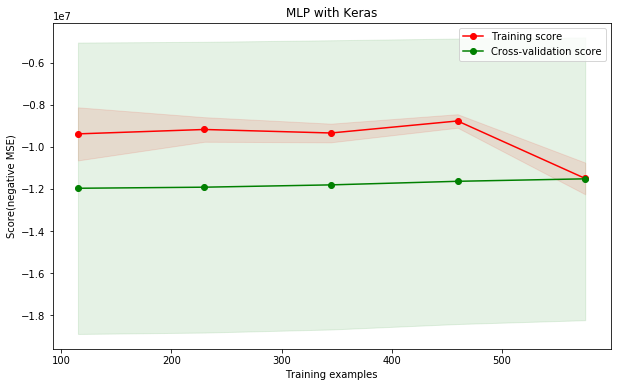

In [19]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = KerasRegressor(build_fn=MLP_model, epochs=10, batch_size=10)

plot_learning_curve(estimator, "MLP with Keras", X_std, y.values, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))